# S2Pandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://vgridpandas.gishub.vn/lab/index.html?path=notebooks/00_intro.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/master)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD)

## Install vgridpandas

In [1]:
# %pip install vgridpandas

## S2

### Latlong to S2

In [2]:
import pandas as pd
from vgridpandas import s2pandas
df = pd.DataFrame({'lat': [10.775299665325505, 10.775299665325505], 'lon':[106.70647975040788,-171.58256682775985]})
resolution = 0
df = df.s2.latlon2s2(resolution)
df

,lat,lon
s2_00,,
3,10.7753,106.706480
7,10.7753,-171.582567


### S2 to geo boundary

In [3]:
df = df.s2.s22geo()
df
# df.plot()
# df.to_file(f"s2_{resolution}.geojson", driver="GeoJSON")

,lat,lon,geometry
s2_00,,,
3,10.7753,106.706480,"POLYGON ((45 -35.26439, 135 -35.26439, 135 35...."
7,10.7753,-171.582567,"MULTIPOLYGON (((180 35.26439, 135 35.26439, 13..."


### Vector to S2 Tokens

<Axes: >

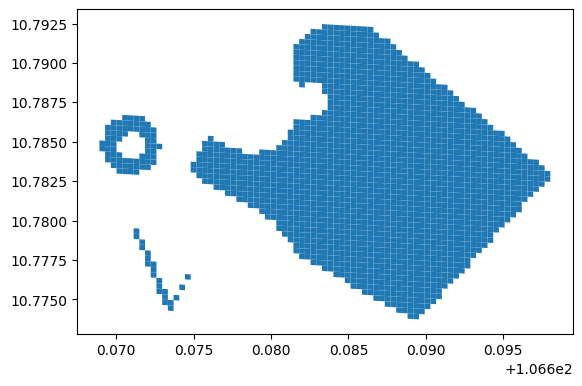

In [4]:
from shapely.geometry import box
from vgridpandas import s2pandas
import geopandas as gpd

gdf = gpd.read_file('https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/polygon.geojson')
resolution = 18
gdf_polyfill = gdf.s2.polyfill(resolution, predicate = "largest_overlap", explode = False)
gdf_polyfill
# print(len(gdf_polyfill))
# gdf_polyfill
gdf_polyfill = gdf_polyfill.s2.s22geo(s2_column = "s2_polyfill")
# print(gdf_polyfill)
gdf_polyfill.plot()
# gdf_polyfill.to_file(f"s2_{resolution}.geojson", driver="GeoJSON")


### S2 point binning

In [5]:
import pandas as pd
import geopandas as gpd
from vgridpandas import s2pandas
resolution = 13
df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
# df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
df.head()
stats = "majority"
df_bin = df.s2.s2bin(resolution=resolution, stats = stats, numeric_column="confidence",category_column="category",return_geometry=True)
df_bin.head()
df_bin.to_file(f"s2bin_{resolution}_{stats}2.geojson", driver="GeoJSON")